In [1]:
from fastai.vision.all import *
from pathlib import Path
from fastai.vision.all import vision_learner
from fastai.callback.tracker import EarlyStoppingCallback

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from IPython.display import clear_output, DisplayHandle
def update_patch(self, obj):
    clear_output(wait=True)
    self.display(obj)
DisplayHandle.update = update_patch

In [2]:
path = Path()
path = Path('../ImageScraping/allShoesTraining')

In [3]:
data= ImageDataLoaders.from_folder(path, train='.', valid_pct=0.2,
                                   item_tfms=Resize(224), batch_tfms=aug_transforms(),
                                   bs=64, num_workers=0)

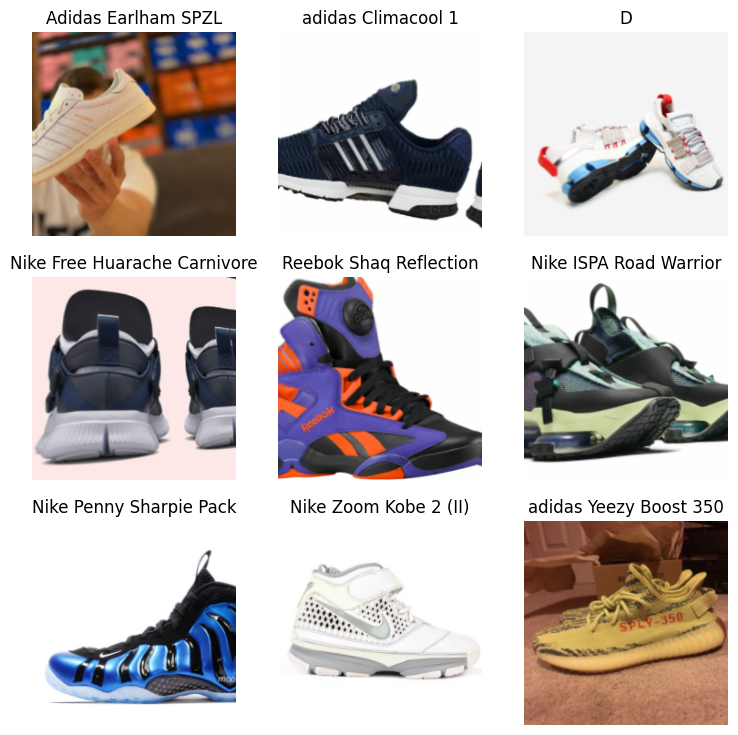

In [4]:
batch = data.show_batch()


In [5]:
early_stop_cb = EarlyStoppingCallback(monitor='valid_loss', min_delta=0.1, patience=2)
progress_cb = ProgressCallback()
 
learn = vision_learner(data, resnet34, metrics=[accuracy,
               Precision(average='macro'),Recall(average='macro')],
                cbs=[early_stop_cb])



/home/daniel/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/daniel/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [7]:
#learn.fit_one_cycle(5, 0.01, cbs=[EarlyStoppingCallback(patience=4)])

learn.fit_one_cycle(10)
#learn.fine_tune(epochs=10)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,7.575428,6.378335,0.063830,0.027044,0.029205,30:01
1,4.856429,3.935341,0.320230,0.355221,0.281107,27:25
2,3.595241,2.805304,0.491320,0.520927,0.468940,27:32
3,3.014132,2.380970,0.556839,0.581025,0.539388,27:37
4,2.728298,2.143054,0.590679,0.604168,0.577614,27:38
5,2.414984,2.018710,0.613306,0.623676,0.600759,27:36
6,2.241808,1.923761,0.632827,0.636071,0.621267,27:17
7,2.118930,1.858820,0.643566,0.644059,0.633124,27:15
8,1.962938,1.838535,0.645458,0.646807,0.635008,27:18
9,1.938732,1.829149,0.645930,0.646135,0.635431,27:50


In [9]:
learn.export('./allshoesnewmodel2.pkl')


In [14]:
learn = load_learner('../ImageScraping/allShoesTraining/allshoesnewmodel2.pkl')

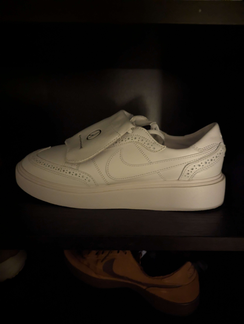

'Puma Ralph Sampson Lo'

'Probability: 0.2453'

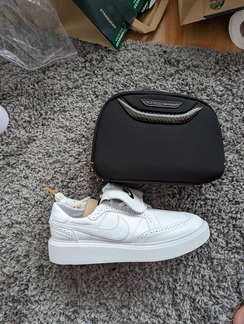

'G-Dragon x Nike Kwondo 1'

'Probability: 0.3268'

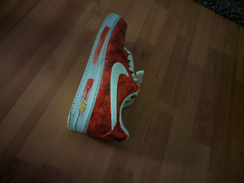

'adidas J Wall 2'

'Probability: 0.2729'

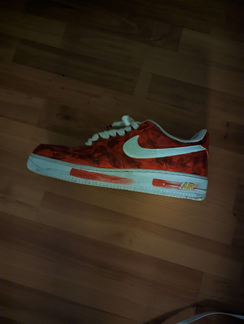

'Nike Air Force 1 Low'

'Probability: 0.3378'

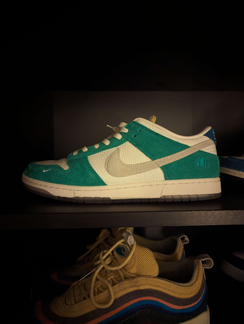

'Nike Dunk Low'

'Probability: 0.2654'

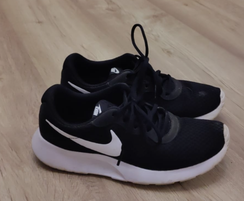

'Nike Free Run 5.0'

'Probability: 0.1301'

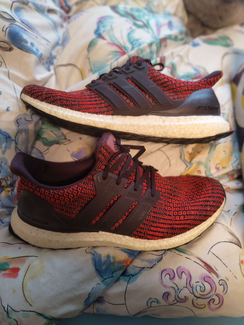

'adidas Ultraboost'

'Probability: 0.7121'

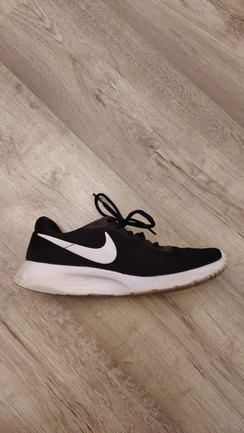

'Jordan Eclipse'

'Probability: 0.0850'

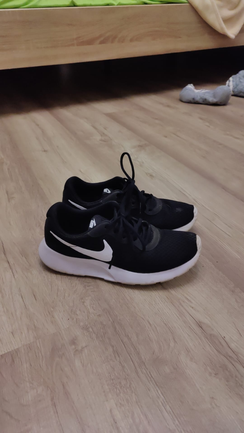

'Nike SB Vulc Rod'

'Probability: 0.1739'

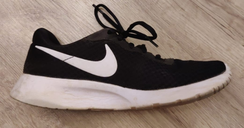

'Nike SB Eric Koston 1'

'Probability: 0.1165'

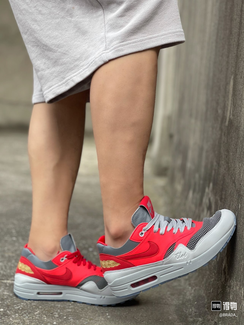

'Nike Air Max 1'

'Probability: 0.1638'

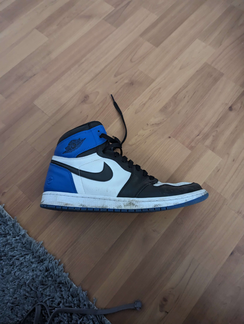

'Air Jordan 1 High'

'Probability: 0.9030'

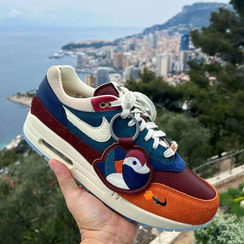

'Nike Air Max 1'

'Probability: 0.2668'

In [15]:

from PIL import Image

import os

resultList = []


for filename in os.listdir("./images"):
    f = os.path.join("./images", filename)
    
    img = Image.open(f)
    wpercent = (244/float(img.size[0]))
    hsize = int((float(img.size[1])*float(wpercent)))
    img = img.resize((244,hsize), Image.Resampling.LANCZOS)
    
    pred, pred_idx, probs = learn.predict(f)
    probString = f"Probability: {probs[pred_idx]:.04f}"
    resultList.append((img,pred,probString))
for result in resultList:
    display(result[0])
    display(result[1])
    display(result[2])
    

In [44]:
from PIL import Image